In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Memanggil data

In [2]:
data_bangkrut = pd.read_csv('bangkrut.csv')
data_bangkrut.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data_bangkrut.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [4]:
data_bangkrut.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [5]:
data_bangkrut.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

# Memilih data yang akan di gunakan

In [6]:
data_analisis = data_bangkrut[['Bankrupt?', ' Total debt/Total net worth', ' Debt ratio %', ' Total income/Total expense', ' Total expense/Assets']]

In [7]:
data_analisis.head()

,Bankrupt?,Total debt/Total net worth,Debt ratio %,Total income/Total expense,Total expense/Assets
0,1,0.021266,0.207576,0.002022,0.064856
1,1,0.012502,0.171176,0.002226,0.025516
2,1,0.021248,0.207516,0.002060,0.021387
3,1,0.009572,0.151465,0.001831,0.024161
4,1,0.005150,0.106509,0.002224,0.026385


In [8]:
data_analisis.isnull().sum()

Bankrupt?                      0
 Total debt/Total net worth    0
 Debt ratio %                  0
 Total income/Total expense    0
 Total expense/Assets          0
dtype: int64

In [9]:
data_analisis.columns

Index(['Bankrupt?', ' Total debt/Total net worth', ' Debt ratio %',
       ' Total income/Total expense', ' Total expense/Assets'],
      dtype='object')

# Korelasi

In [10]:
data_analisis.corr()

,Bankrupt?,Total debt/Total net worth,Debt ratio %,Total income/Total expense,Total expense/Assets
Bankrupt?,1.000000,0.012314,0.250161,-0.007137,0.139049
Total debt/Total net worth,0.012314,1.000000,-0.054049,-0.000725,-0.015686
Debt ratio %,0.250161,-0.054049,1.000000,-0.027995,0.037513
Total income/Total expense,-0.007137,-0.000725,-0.027995,1.000000,-0.022219
Total expense/Assets,0.139049,-0.015686,0.037513,-0.022219,1.000000


<Axes: >

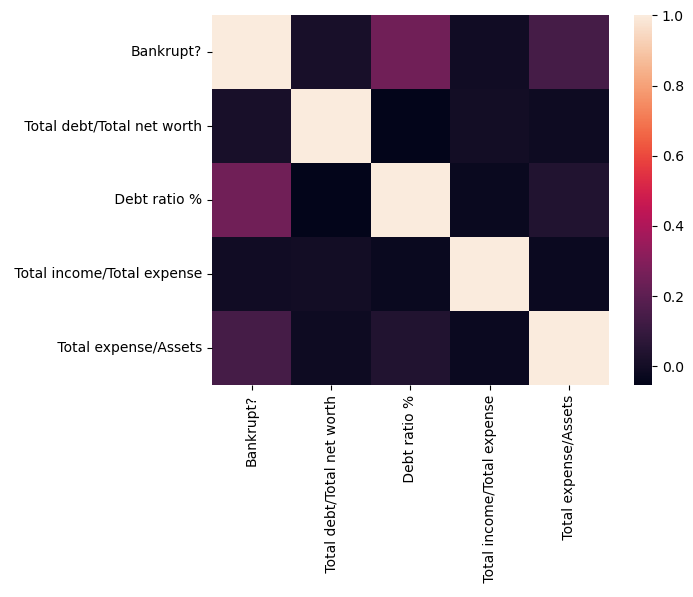

In [11]:
sns.heatmap(data_analisis.corr())

<Axes: >

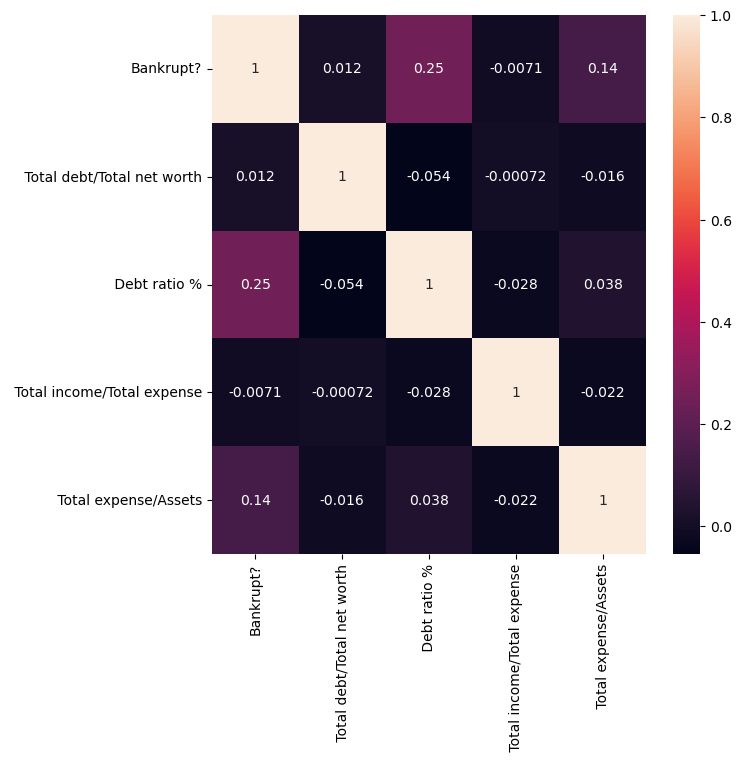

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data_analisis.corr(),ax=ax,annot=True)

In [22]:
X = data_analisis.drop(['Bankrupt?'],axis=1)
X.head()

,Total debt/Total net worth,Debt ratio %,Total income/Total expense,Total expense/Assets
0,0.021266,0.207576,0.002022,0.064856
1,0.012502,0.171176,0.002226,0.025516
2,0.021248,0.207516,0.002060,0.021387
3,0.009572,0.151465,0.001831,0.024161
4,0.005150,0.106509,0.002224,0.026385


In [23]:
y = data_analisis['Bankrupt?']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

# Split train dan test data 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)